# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Time Series Analysis in Python
- This exercise aims to get better insight into how the energy (load) was consumed over time and to build machine learning models to predict future energy consumption (load).:

### About the data source
- Daily electricity demand, generation by source, and spot price Spanish market (2014-2018)<br>
- [Data Soure](https://www.esios.ree.es/en)


In [5]:
# import all the relevant libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import plotly.express as px

# to display max column width
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [21]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [7]:
# in the below we are making the first column time as index column and time column to date time format.
# and get only those which are necessary for our EDA.
energy_df = pd.read_csv(r'H:\Work\Analytics\Python\Python Data\Energy Demand\energy_dataset.csv',
                         usecols=['time', 'total load forecast', 'total load actual'],
                   index_col=0,
                   parse_dates=[0])
energy_df.head()

total load forecast  total load actual
time                                                             
2015-01-01 00:00:00+01:00              26118.0            25385.0
2015-01-01 01:00:00+01:00              24934.0            24382.0
2015-01-01 02:00:00+01:00              23515.0            22734.0
2015-01-01 03:00:00+01:00              22642.0            21286.0
2015-01-01 04:00:00+01:00              21785.0            20264.0

In [9]:
# check how many years of data we have
print(energy_df.index.min())
print(energy_df.index.max())

2015-01-01 00:00:00+01:00
2018-12-31 23:00:00+01:00


In [10]:
# check missing values.
energy_df.isnull().sum()

total load forecast     0
total load actual      36
dtype: int64

- Actuall load got 36 missing values.

In [11]:
# for this excercise i am just simple f fill method to replace missing values.
energy_df['total load actual'] = energy_df['total load actual'].ffill()
energy_df.isnull().sum()

total load forecast    0
total load actual      0
dtype: int64

In [12]:
# create a copy of the file
en_df = energy_df.copy()

In [13]:
# we have to convert the time index column to date time otherwisze you will get error while plotting the charts and also while applying filter on index col
en_df.index = pd.to_datetime(en_df.index, utc=True)

In [14]:
# selecting data from 2015 to 2018 only.
en_df = en_df['2015':'2018']

In [15]:
# get only those columns needed for eda
df_demand = en_df[['total load actual', 'total load forecast']]

# rename the columns
df_demand.columns = ['load', 'forecast']
df_demand.head()

load  forecast
time                                        
2015-01-01 00:00:00+00:00  24382.0   24934.0
2015-01-01 01:00:00+00:00  22734.0   23515.0
2015-01-01 02:00:00+00:00  21286.0   22642.0
2015-01-01 03:00:00+00:00  20264.0   21785.0
2015-01-01 04:00:00+00:00  19905.0   21441.0

-------------------------

# Exploratory data analysis.
- In this section we apply different charts and tables to visualize how energy consumption has changed over time.

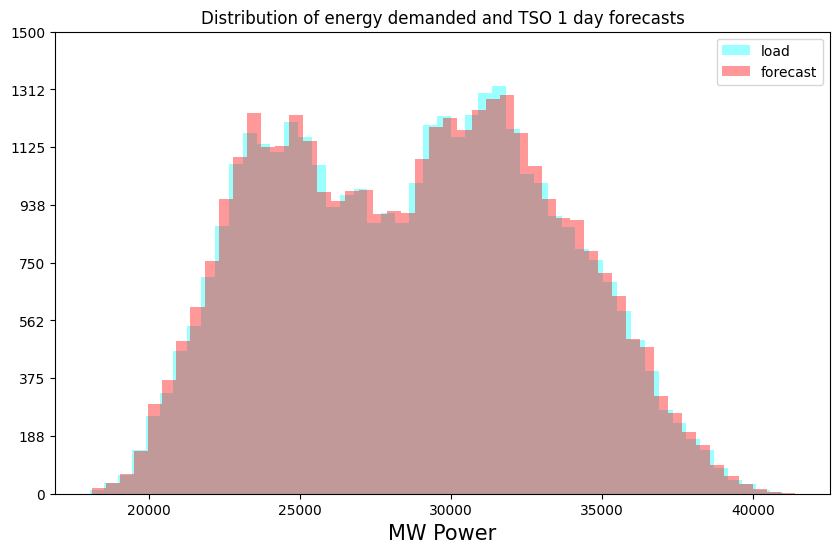

In [16]:
# visualize the distribution of load and forecast.
fig, ax = plt.subplots(figsize=(10, 6))

sns.distplot(df_demand['load'].dropna(), ax=ax, kde=False, color='#00FFFF').set_title('load', fontsize=16)
sns.distplot(df_demand['forecast'].dropna(), ax=ax, kde=False, color='#FF0000').set_title('forecast', fontsize=16)
plt.xlabel('MW Power', fontsize=15)
plt.legend(['load', 'forecast'])
ax.set_yticks(np.linspace(0, 1500, 9))
plt.title('Distribution of energy demanded and TSO 1 day forecasts')
plt.show()

- Load and Forecast are very close to each other.

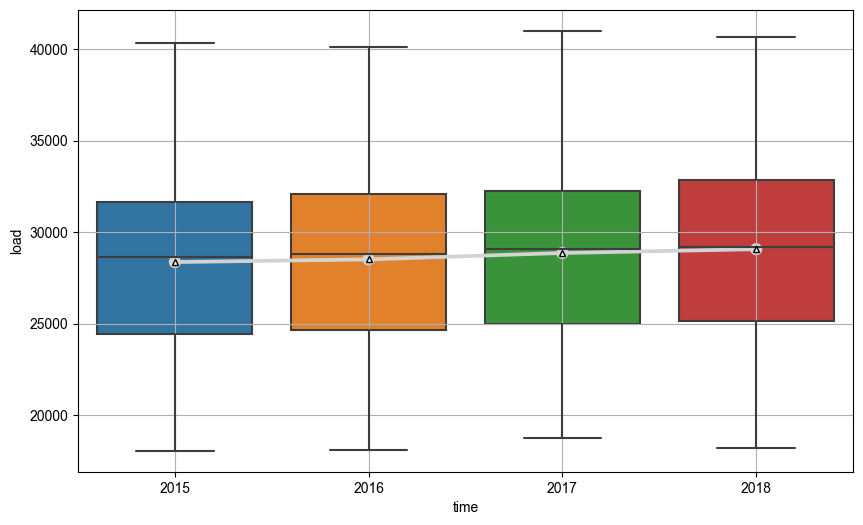

In [17]:
# view the distribution of load by year
_, ax = plt.subplots(figsize=(10,6))
sns.set_style("ticks")
ax = sns.boxplot(x = df_demand.index.year,y = df_demand['load'],ax=ax, showmeans=True,meanprops={"markerfacecolor":"white",
                                                                                  "markeredgecolor":"black", "markersize":"5"})
ax = sns.pointplot(x = df_demand.index.year,y = df_demand['load'],ax=ax, ci=None, color='lightgrey')
plt.grid();

- We dont see  any variations in the load by year.

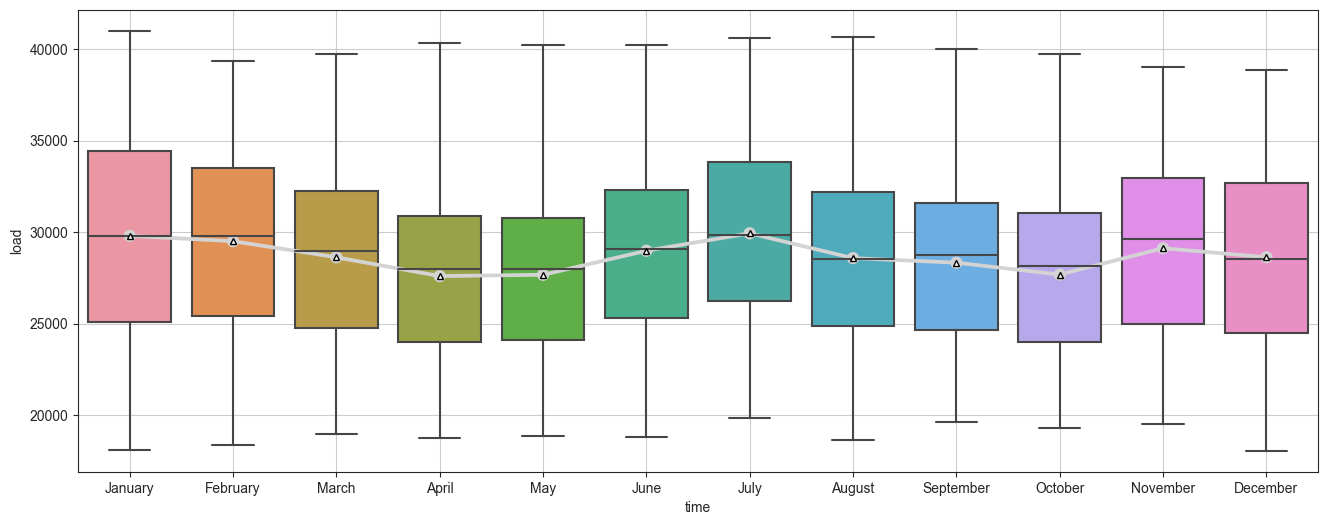

In [18]:
# view the load distribution by month for all years.
_, ax = plt.subplots(figsize=(16,6))
sns.set_style("ticks")
ax = sns.boxplot(x = df_demand.index.month_name(),y = df_demand['load'],ax=ax, showmeans=True,meanprops={"markerfacecolor":"white",
                                                                                  "markeredgecolor":"black", "markersize":"5"})
ax = sns.pointplot(x = df_demand.index.month_name(),y = df_demand['load'],ax=ax, ci=None, color='lightgrey')
plt.grid();

- Around Mar to May we can observe the average load goes down and again from Aug to Oct the average load goes down.

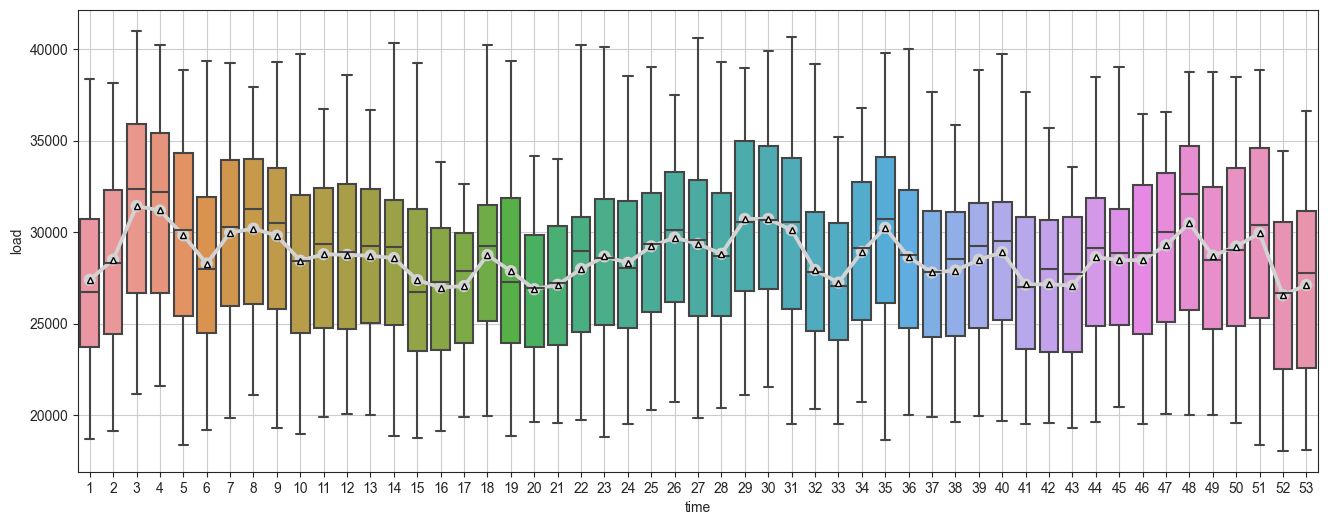

In [19]:
_, ax = plt.subplots(figsize=(16,6))
sns.set_style("ticks")
ax = sns.boxplot(x = df_demand.index.week,y = df_demand['load'],ax=ax, showmeans=True,meanprops={"markerfacecolor":"white",
                                                                                  "markeredgecolor":"black", "markersize":"5"})
ax = sns.pointplot(x = df_demand.index.week,y = df_demand['load'],ax=ax, ci=None, color='lightgrey')
plt.grid();

- We see lot of variations during different weeks but the data remains stationary with no outliers.

In [22]:
df_demand1 = df_demand.copy()

In [166]:
df_demand1['pct_change'] = df_demand1.load.pct_change()*100
df_demand1.head()

load  forecast  pct_change
time                                                    
2015-01-01 00:00:00+00:00  24382.0   24934.0         NaN
2015-01-01 01:00:00+00:00  22734.0   23515.0   -6.759085
2015-01-01 02:00:00+00:00  21286.0   22642.0   -6.369315
2015-01-01 03:00:00+00:00  20264.0   21785.0   -4.801278
2015-01-01 04:00:00+00:00  19905.0   21441.0   -1.771615

In [23]:
# create a pivot table to view the daily load. 
daily_load_across_years = pd.pivot_table(df_demand, values = 'load', aggfunc='mean', columns = df_demand.index.year, index = df_demand.index.weekday)
daily_load_across_years

time          2015          2016          2017          2018
time                                                        
0     29017.177885  28969.418269  28908.100160  29573.257278
1     29284.080929  29422.599359  29599.544872  29564.491987
2     29278.280449  29418.303686  30142.452724  30123.306891
3     28838.477201  29641.461538  29394.998397  29937.540865
4     29044.382212  28776.988994  29786.080128  29795.117788
5     27027.310096  27177.238208  27624.618590  27836.443109
6     26021.162660  26169.557692  26595.846698  26616.738782

In [25]:
# Load consumption by days.
import calendar
import plotly.express as px

fig = px.line(daily_load_across_years, markers=True)

named_index = [[calendar.day_abbr[i] if isinstance(i, int) else i for i in list(daily_load_across_years.index)]] # name days
daily_load_across_years = daily_load_across_years.set_index(named_index)

fig.update_layout(
   title="Average Load by Days", xaxis_title="Days", yaxis_title="Load Consumption", legend_title="Year", font=dict(
      family="Courier New, monospace", size=14, color="RebeccaPurple"))
fig.show()

- We can observe that during the weekends the average daily load goes down.

In [26]:
monthly_load_across_years = pd.pivot_table(df_demand, values = 'load', aggfunc='mean', columns = df_demand.index.year, index = df_demand.index.month)
monthly_load_across_years

time          2015          2016          2017          2018
time                                                        
1     29960.642473  29309.133065  30238.084677  29673.838710
2     29480.300595  29274.227011  28952.169643  30312.413690
3     28431.045699  28014.223118  28610.548387  29434.467742
4     27425.873611  27995.704167  27068.497222  27885.902778
5     27469.045699  27344.268817  27817.787634  28024.944892
6     28051.116667  28273.697222  30350.516667  29248.647222
7     30508.004032  29523.100806  30097.200269  29605.114247
8     27723.881720  28785.470430  28730.227151  29067.302419
9     27739.291667  28223.140278  28181.772222  29166.197222
10    27640.674731  27310.948925  27667.961022  28083.430108
11    28268.579167  29141.355556  29608.168056  29455.355556
12    27667.013441  28935.895161  28978.572581  28928.784657

In [28]:
# Load consumption by month break down by year
import calendar
import plotly.express as px
fig = px.line(monthly_load_across_years, markers=True)

named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(monthly_load_across_years.index)]] # name months
monthly_load_across_years = monthly_load_across_years.set_index(named_index)

fig.update_layout(
    title="Average Load by Month", xaxis_title="Month", yaxis_title="Load Consumption", legend_title="Year", font=dict(
        family="Courier New, monospace", size=14, color="RebeccaPurple"))
fig.show()

- We can see that  after Feb energy consumption goes and again it incrases during the month of May tilll July and then again it goes down. So Feb and July is the time where the load peaks. 

In [29]:
hourly_load_across_years = pd.pivot_table(df_demand, values ='load', aggfunc='mean', columns = df_demand.index.year, index = df_demand.index.hour)
hourly_load_across_years

time          2015          2016          2017          2018
time                                                        
0     23669.967123  23801.450820  24189.200000  24146.901370
1     22846.046575  22984.510929  23402.345205  23361.747945
2     22470.542466  22619.560109  23050.435616  23002.487671
3     22520.438356  22686.904372  23112.424658  23075.260274
4     23466.156164  23698.297814  24094.041096  24131.232877
5     25355.449315  25649.133880  26029.627397  26181.158904
6     27516.758904  27842.510929  28186.739726  28450.854795
7     29327.172603  29607.016393  29943.539726  30299.019178
8     30624.852055  30874.106557  31189.172603  31599.715068
9     31429.720548  31570.524590  31888.663014  32337.016438
10    31731.394521  31876.691257  32215.010959  32632.041096
11    31793.408219  31942.325137  32302.575342  32734.221918
12    31339.567123  31483.204918  31887.375342  32335.624658
13    30522.358904  30650.532787  31087.227397  31545.630137
14    30031.693151  30153.830601  30582.468493  30987.076712
15    29884.128767  29991.683060  30394.821918  30717.219178
16    30005.490411  30083.467213  30435.772603  30665.306849
17    30600.334247  30692.016393  30998.767123  31180.391781
18    31446.243836  31523.770492  31811.936986  31974.493151
19    31989.706849  32082.833333  32334.202740  32484.509589
20    31076.758904  31129.098361  31349.715068  31462.506849
21    28995.843836  29042.387978  29262.630137  29362.882192
22    26909.145205  27002.603825  27304.942466  27336.408219
23    25087.071233  25200.636612  25545.676712  25550.986264

In [30]:
# Load consumption by hourly break down by year
import plotly.express as px
fig = px.line(hourly_load_across_years, markers=True)

fig.update_layout(
    title="Average yearly energy demand by hour of the day", xaxis_title="Hours", yaxis_title="Load Consumption", legend_title="Year", font=dict(
        family="Courier New, monospace", size=14, color="RebeccaPurple"))
fig.show()

- we can observe that around 10'00 and 19:00 load peaks up for each year.

**Above and Below charts are the same representation, in the above I have used Plotly and below Seaborn**

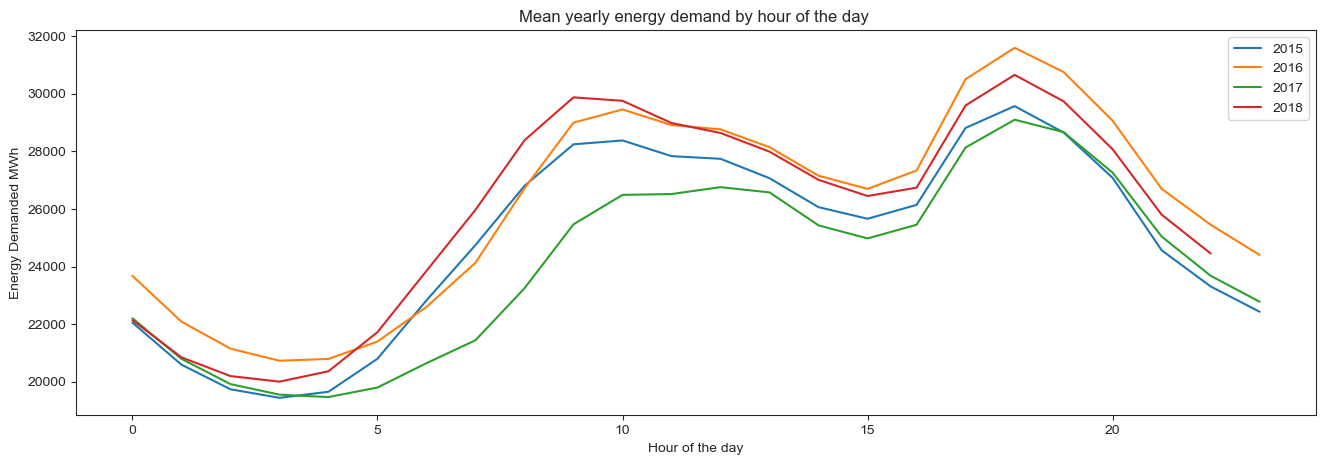

In [173]:
# visualize the average energy by hour for each year. 

group_hours = df_demand['load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(16,5))

year_demands = pd.DataFrame()
    
for name, group in group_hours:
    year_demands[name.year] = pd.Series(group.values)
    
year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean yearly energy demand by hour of the day ');

- Early morning not enough consumption of energy, as the day progress we can see significant increase in energy consumption (around 09:00 am)and again around 16:00 energy consumption increase and goes peak around 18:00 and then drops.
- Yeear 2016 and 2018 we can see some significant rise in power consumption. Year 2017 we dont see much of the energy consumtion through out the day.

In [174]:
monthly_load_by_hours = pd.pivot_table(df_demand, values ='load', aggfunc='mean', columns = df_demand.index.month, index = df_demand.index.hour)
monthly_load_by_hours

time            1             2             3             4             5   \
time                                                                         
0     25320.911290  24827.805310  24299.846774  22824.458333  22922.177419   
1     24029.620968  23640.123894  23233.419355  22292.641667  22452.830645   
2     23420.201613  23114.070796  22731.362903  22101.016667  22259.064516   
3     23182.387097  22947.681416  22634.354839  22377.758333  22540.040323   
4     23516.354839  23354.035398  23243.774194  23999.941667  23903.233871   
5     25229.887097  25245.663717  25123.104839  26142.933333  25916.225806   
6     28219.145161  28203.212389  27331.959677  27908.266667  27919.653226   
7     30360.564516  30156.265487  29384.233871  29461.575000  29471.419355   
8     31839.024194  31809.893805  30841.362903  30451.550000  30436.290323   
9     32918.741935  32804.150442  31828.838710  30809.875000  30887.080645   
10    33152.314516  32991.168142  32032.354839  30984.616667  31067.645161   
11    33005.733871  32876.477876  31953.209677  30985.250000  31244.258065   
12    32986.088710  32869.327434  31792.169355  30152.233333  30387.629032   
13    32130.645161  31969.353982  30908.548387  29304.358333  29537.411290   
14    31331.177419  31166.743363  30104.193548  28894.175000  29251.201613   
15    30955.564516  30758.557522  29699.153226  28759.775000  29182.096774   
16    31053.419355  30700.867257  29572.983871  28748.750000  29157.814516   
17    32298.975806  31169.389381  29853.451613  29032.658333  29304.362903   
18    33591.846774  32910.292035  31259.524194  29867.608333  29732.790323   
19    34084.951613  33698.938053  32698.774194  31144.108333  30447.685484   
20    33889.322581  33505.265487  32215.669355  29489.375000  29380.532258   
21    31997.056452  31575.557522  30310.822581  27202.933333  27143.491935   
22    29327.572581  28984.433628  27965.185484  25474.941667  25460.435484   
23    27248.685484  26786.424779  25923.411290  23845.066667  23930.911290   

time            6             7             8             9             10  \
time                                                                         
0     24096.700000  24795.120968  23781.830645  23288.908333  22640.112903   
1     23537.475000  24145.459677  23180.677419  22839.966667  22159.177419   
2     23296.366667  23838.830645  22893.338710  22662.525000  21967.620968   
3     23494.633333  24016.338710  23050.137097  22925.441667  22220.620968   
4     24676.441667  25345.137097  24309.161290  24544.766667  23688.814516   
5     26577.258333  27066.250000  25903.483871  27103.341667  26273.443548   
6     28475.825000  28996.701613  27482.604839  28554.291667  28122.193548   
7     30250.108333  31018.266129  29329.830645  29911.533333  29391.983871   
8     31466.808333  32409.717742  30659.943548  30825.558333  30330.911290   
9     32055.666667  33095.024194  31424.629032  31340.050000  30719.782258   
10    32570.458333  33693.733871  31965.798387  31717.925000  30947.822581   
11    32842.033333  34085.096774  32377.467742  31870.575000  30992.677419   
12    32166.958333  33544.790323  31917.637097  31075.191667  30254.532258   
13    31445.050000  32876.120968  31144.725806  30344.500000  29428.072581   
14    31207.808333  32619.677419  30821.177419  30077.316667  28995.959677   
15    31189.433333  32541.822581  30727.709677  30073.125000  28920.290323   
16    31136.950000  32400.879032  30717.008065  30073.908333  29085.435484   
17    31217.216667  32363.556452  30665.870968  30322.975000  30253.983871   
18    31293.775000  32259.959677  31034.717742  31652.783333  31551.629032   
19    31349.508333  32354.483871  31970.459677  31813.858333  31262.064516   
20    30598.800000  31570.064516  30534.322581  29542.541667  29241.185484   
21    28476.258333  29425.620968  28369.411290  27259.266667  26977.161290   
22    26877.016667  27843.572581  26621.225806  25751.083333  25086.016129   
23    25245.316667  2

In [175]:
# Load consumption by hours break down by months.
import plotly.express as px
fig = px.line(monthly_load_by_hours, markers=True)

fig.update_layout(
    title="Average Montly energy demand by hour of the day", xaxis_title="Hours", yaxis_title="Load Consumption", legend_title="Months", font=dict(
        family="Courier New, monospace", size=14, color="RebeccaPurple"))
fig.show()

- 

**Above and Below charts are the same representation, in the above I have used Plotly and below Seaborn**

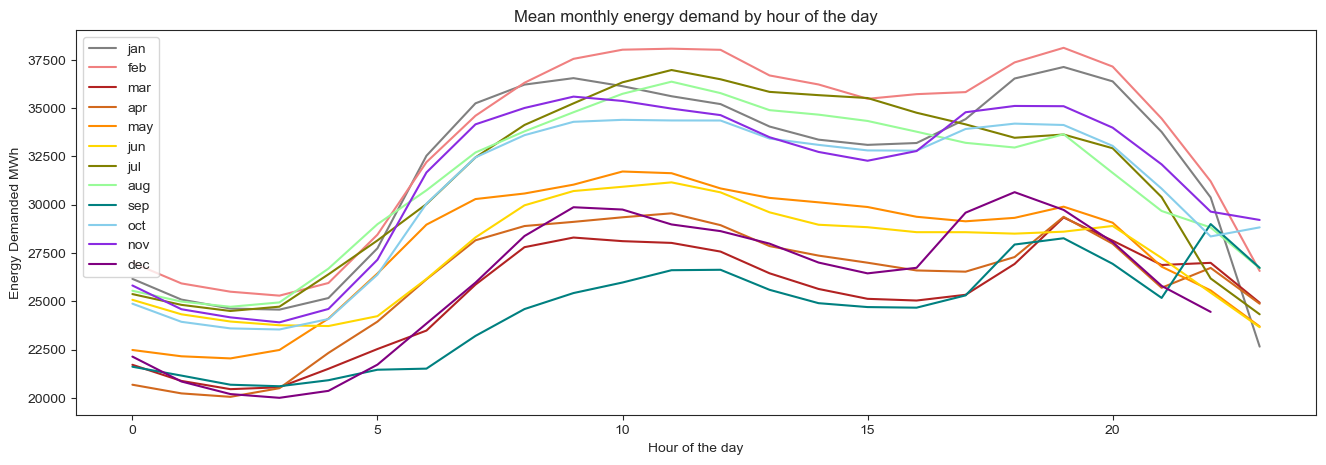

In [176]:
group_hours = df_demand['load'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(16,5))

df = pd.DataFrame()
    
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']    

for name, group in group_hours:
    df[name.month] = pd.Series(group.values)

    
colors = ['gray', 'lightcoral', 'firebrick', 'chocolate', 'darkorange', 'gold', 'olive', 'palegreen', 'teal', 'skyblue', 'blueviolet', 'purple']
df.columns = months
df.plot(ax=axs, color=colors)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Demanded MWh')
axs.set_title('Mean monthly energy demand by hour of the day');

In [177]:
# Resample to monthly precip sum and save as new dataframe to visualize how the monthly data is distributed.
monthly_data = df_demand.resample('M').sum()

monthly_data.head()

load    forecast
time                                             
2015-01-31 00:00:00+00:00  22290718.0  22407742.0
2015-02-28 00:00:00+00:00  19810762.0  19903758.0
2015-03-31 00:00:00+00:00  21152698.0  21119101.0
2015-04-30 00:00:00+00:00  19746629.0  19766212.0
2015-05-31 00:00:00+00:00  20436970.0  20485088.0

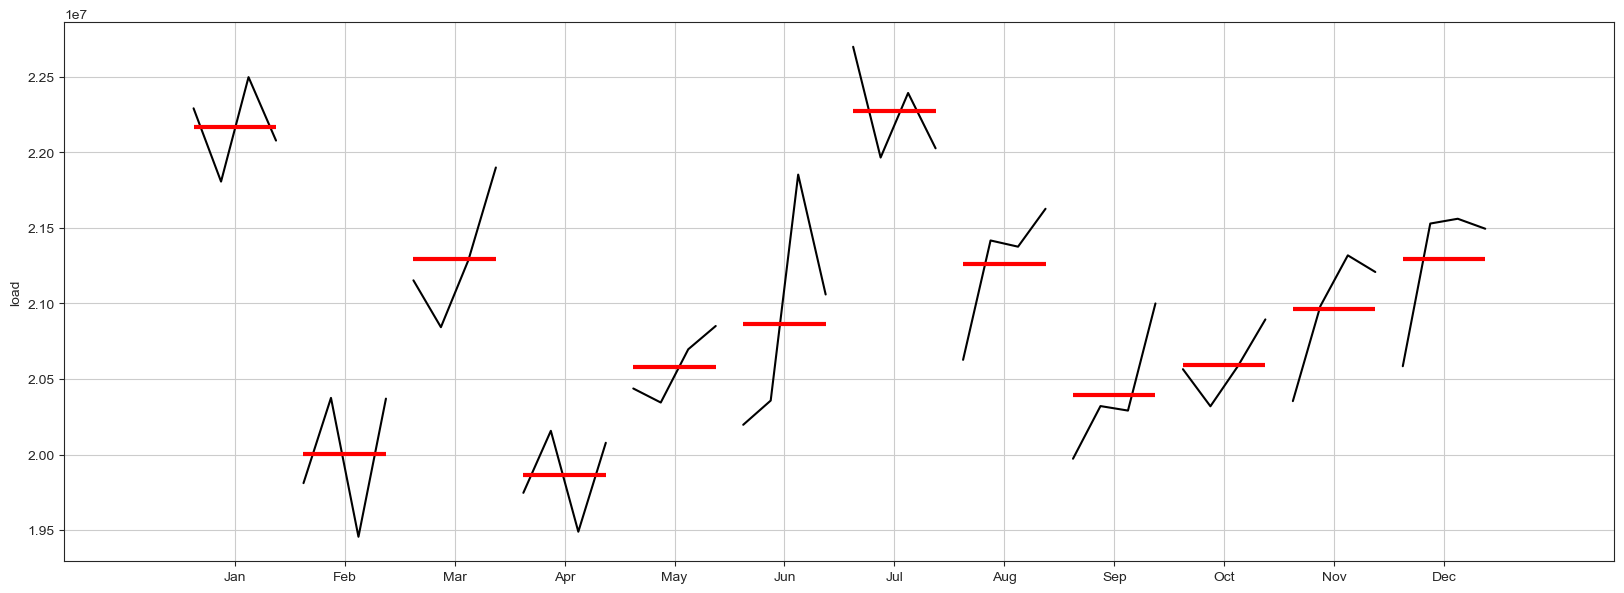

In [178]:

from statsmodels.graphics.tsaplots import month_plot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7

month_plot(monthly_data['load'],ylabel='load')
plt.grid();

- This plot shows us the behaviour of the Time Series LOAD across various months. The red line is the median value.

**Plot the Empirical Cumulative Distribution.**

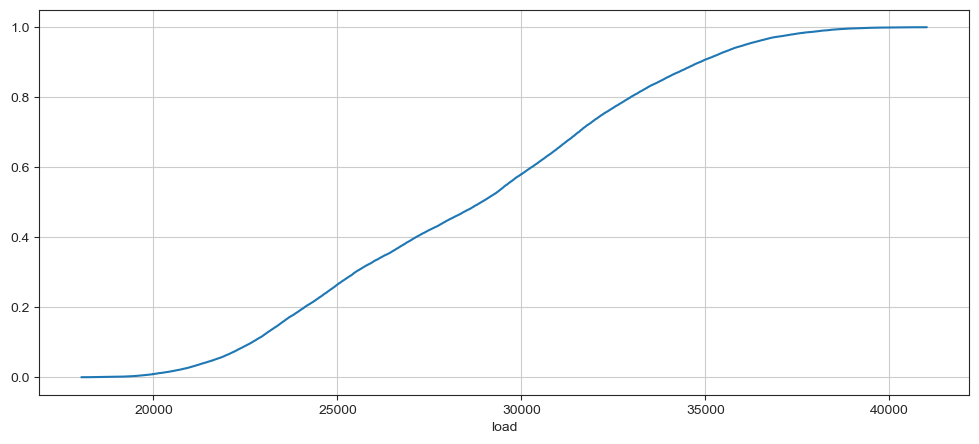

In [191]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 5))
cdf = ECDF(df_demand['load'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('load');

- This particular graph tells us what percentage of data points refer to what number of Load.

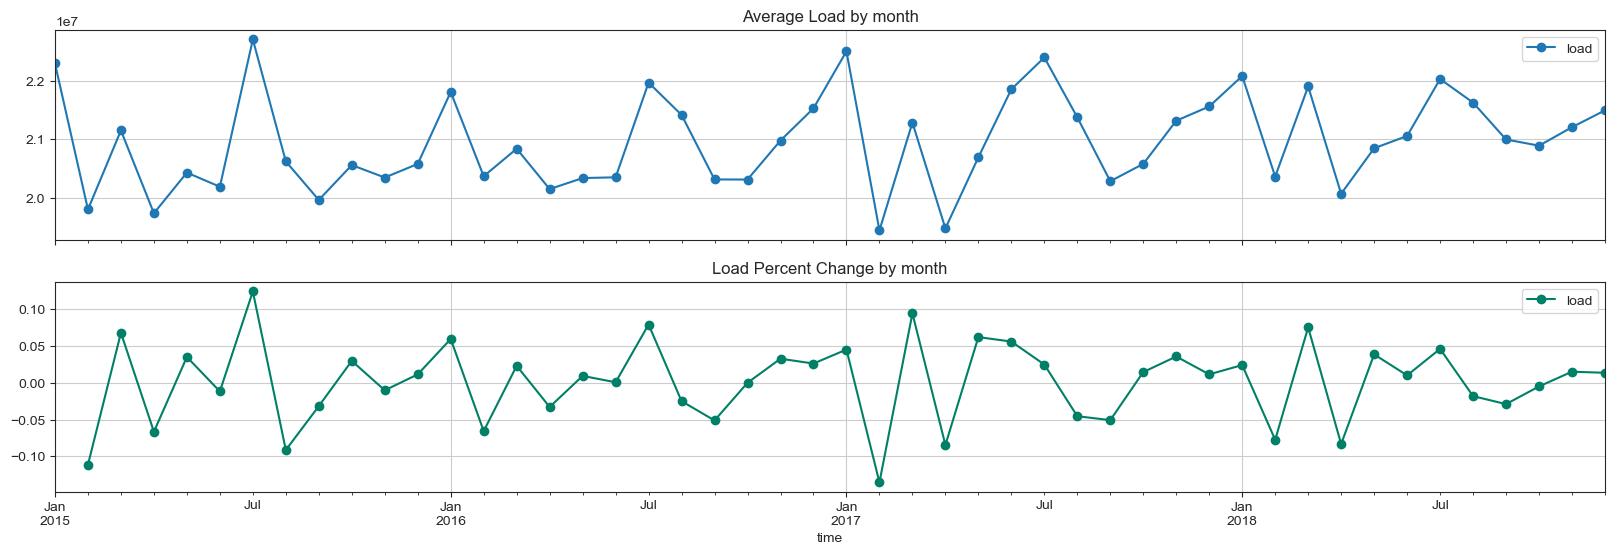

In [180]:
# group by date and get average RetailSales, and precent change
average    = monthly_data.groupby(monthly_data.index)["load"].mean()
pct_change = monthly_data.groupby(monthly_data.index)["load"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20,6))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Load by month",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Load Percent Change by month",grid=True)

- First chart shows the Average load by month and second chart shows the Load percentage change by month.

In [181]:
# lets build a vertical heat map by year and month
# create a copy of the file.
df_demand1 = df_demand.copy()

In [182]:
# reset_index
df_demand1 = df_demand1.reset_index()
df_demand1.head()

time     load  forecast
0 2015-01-01 00:00:00+00:00  24382.0   24934.0
1 2015-01-01 01:00:00+00:00  22734.0   23515.0
2 2015-01-01 02:00:00+00:00  21286.0   22642.0
3 2015-01-01 03:00:00+00:00  20264.0   21785.0
4 2015-01-01 04:00:00+00:00  19905.0   21441.0

In [183]:
# create  month and year column.
df_demand1['month'] = df_demand1['time'].apply(lambda time:time.month)
df_demand1['year'] = df_demand1['time'].apply(lambda year:year.year)
df_demand1.head()

time     load  forecast  month  year
0 2015-01-01 00:00:00+00:00  24382.0   24934.0      1  2015
1 2015-01-01 01:00:00+00:00  22734.0   23515.0      1  2015
2 2015-01-01 02:00:00+00:00  21286.0   22642.0      1  2015
3 2015-01-01 03:00:00+00:00  20264.0   21785.0      1  2015
4 2015-01-01 04:00:00+00:00  19905.0   21441.0      1  2015

In [184]:
import calendar
all_month_year_df = pd.pivot_table(df_demand1, values="load",
                                   index=["month"],
                                   columns=["year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

year          2015          2016          2017          2018           All
Jan   29960.642473  29309.133065  30238.084677  29673.838710  29795.424731
Feb   29480.300595  29274.227011  28952.169643  30312.413690  29502.737463
Mar   28431.045699  28014.223118  28610.548387  29434.467742  28622.571237
Apr   27425.873611  27995.704167  27068.497222  27885.902778  27593.994444
May   27469.045699  27344.268817  27817.787634  28024.944892  27664.011761
Jun   28051.116667  28273.697222  30350.516667  29248.647222  28980.994444
Jul   30508.004032  29523.100806  30097.200269  29605.114247  29933.354839
Aug   27723.881720  28785.470430  28730.227151  29067.302419  28576.720430
Sep   27739.291667  28223.140278  28181.772222  29166.197222  28327.600347
Oct   27640.674731  27310.948925  27667.961022  28083.430108  27675.753696
Nov   28268.579167  29141.355556  29608.168056  29455.355556  29118.364583
Dec   27667.013441  28935.895161  28978.572581  28928.784657  28627.465210
All   28360.010388  28507.879098  28858.304680  29065.180043  28697.703049

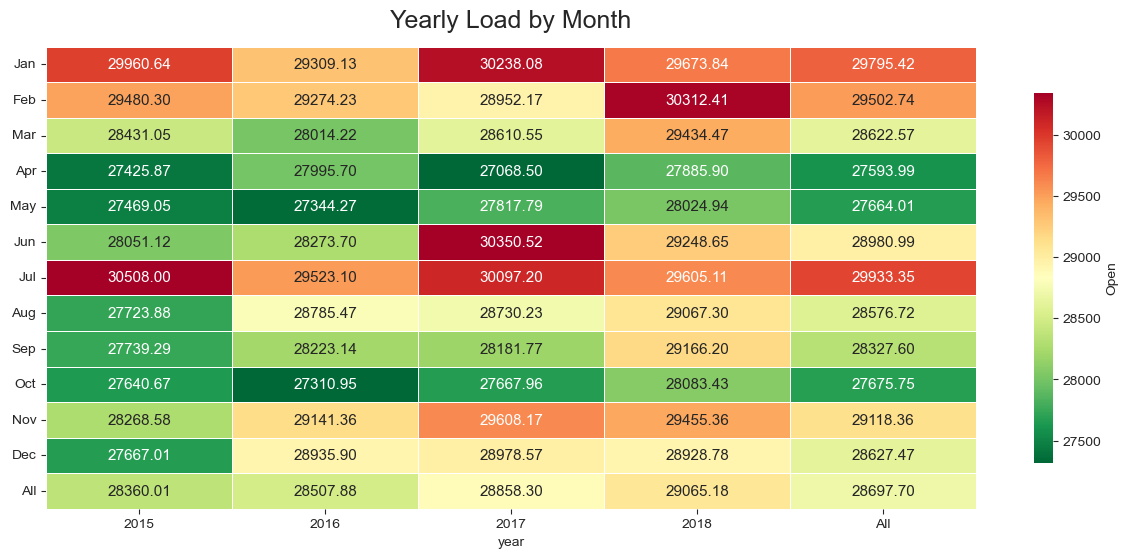

In [185]:
# heat map of the load by year and month
plt.figure(figsize=(15,6))

ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax = plt.title('Yearly Load by Month', fontdict={'fontsize':18},pad=14);

- Darker red means very high load consumption and dark green mean very low load consumption.

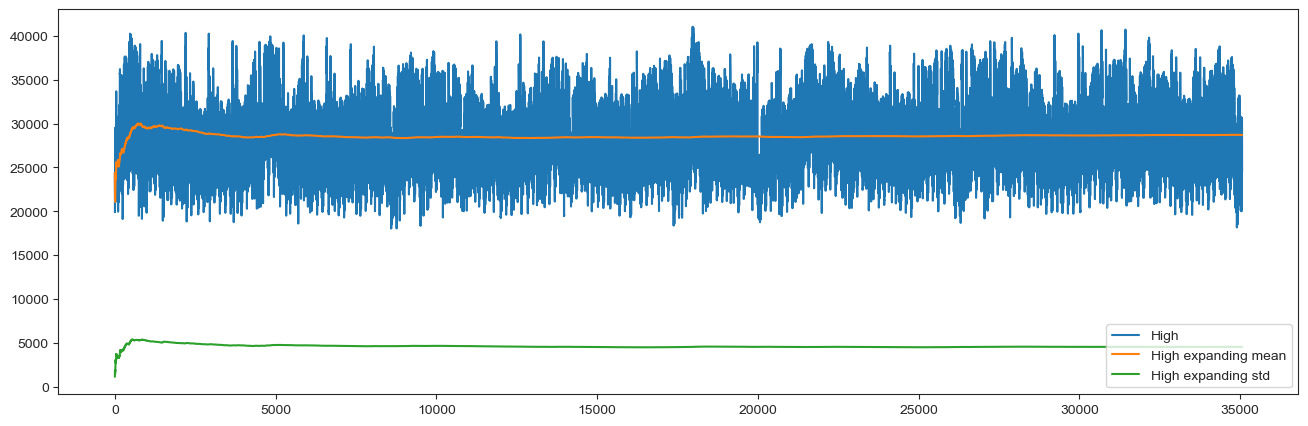

In [186]:
fig, ax = plt.subplots(figsize=(16,5))
ax = df_demand1.load.plot(label='High')
ax = df_demand1.load.expanding().mean().plot(label='High expanding mean')
ax = df_demand1.load.expanding().std().plot(label='High expanding std')
ax.legend(loc='lower right');

- Here I added expanding mean and standard deviation. Looking at the daily load we dont see any spikes we can say that data is stationary and the mean and standard deviation is constant over time.

------------------------------

# Model Building

In [199]:
# selecting only latest 2 months of data.
df = df_demand.loc['2018-11-1':'2018-12-31']
df.head()

load  forecast
time                                        
2018-11-01 00:00:00+00:00  26646.0   26735.0
2018-11-01 01:00:00+00:00  25233.0   25306.0
2018-11-01 02:00:00+00:00  24749.0   24860.0
2018-11-01 03:00:00+00:00  24751.0   24735.0
2018-11-01 04:00:00+00:00  25463.0   25354.0

### Decompose the Time Series and plot the different components.

In [202]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Additive Decomposition**

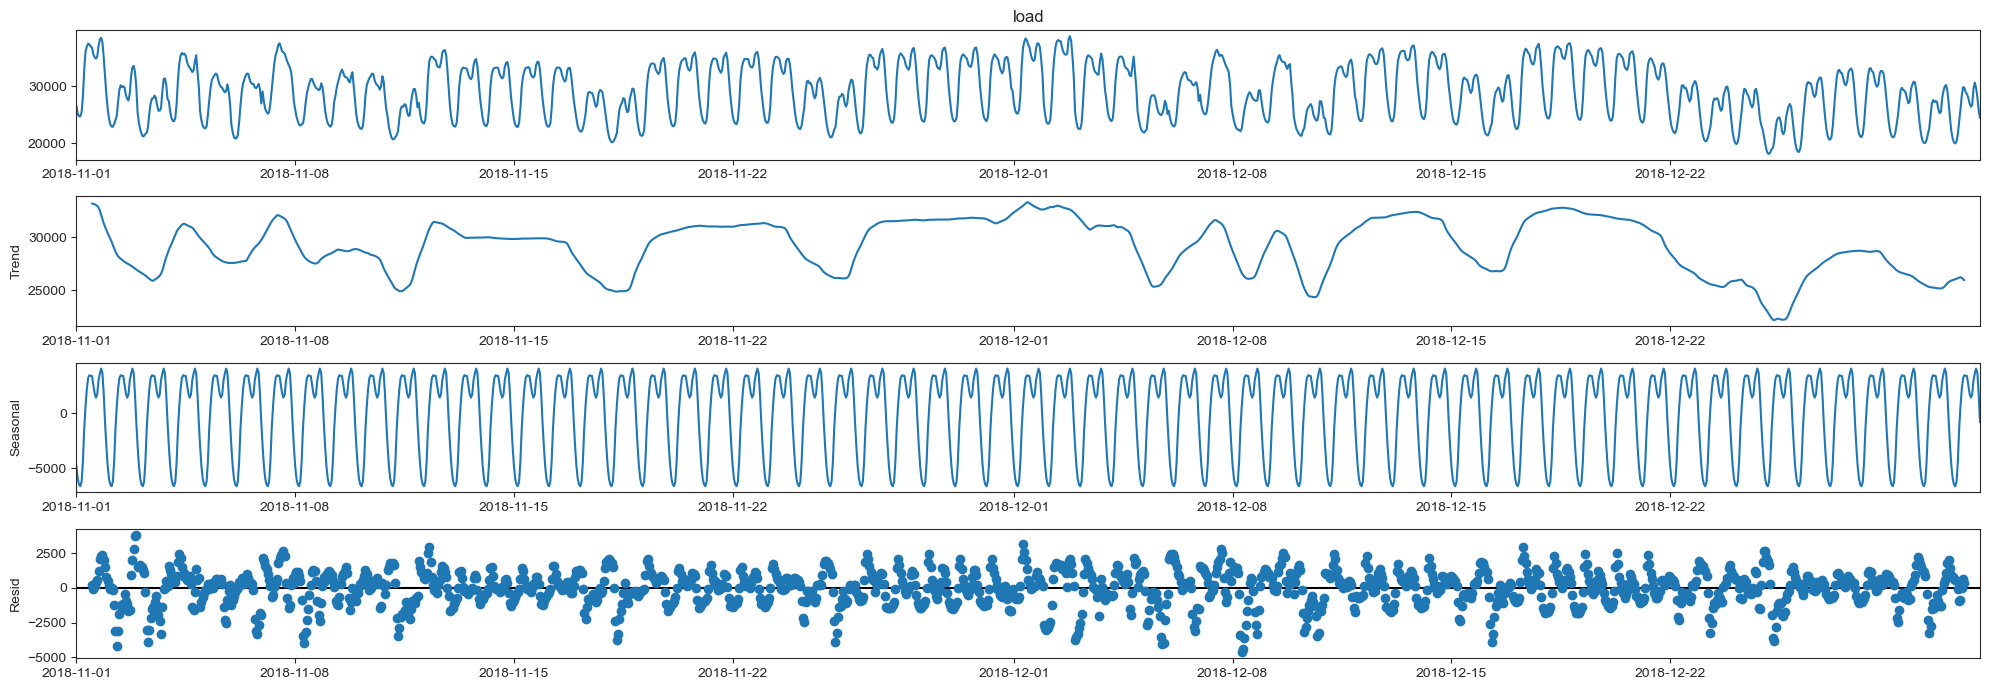

In [203]:
decomposition = seasonal_decompose(df['load'],model='additive')
decomposition.plot();

- We see that the residuals are located around 0 and see patterns in the errros.

**Multiplicative decomposition**

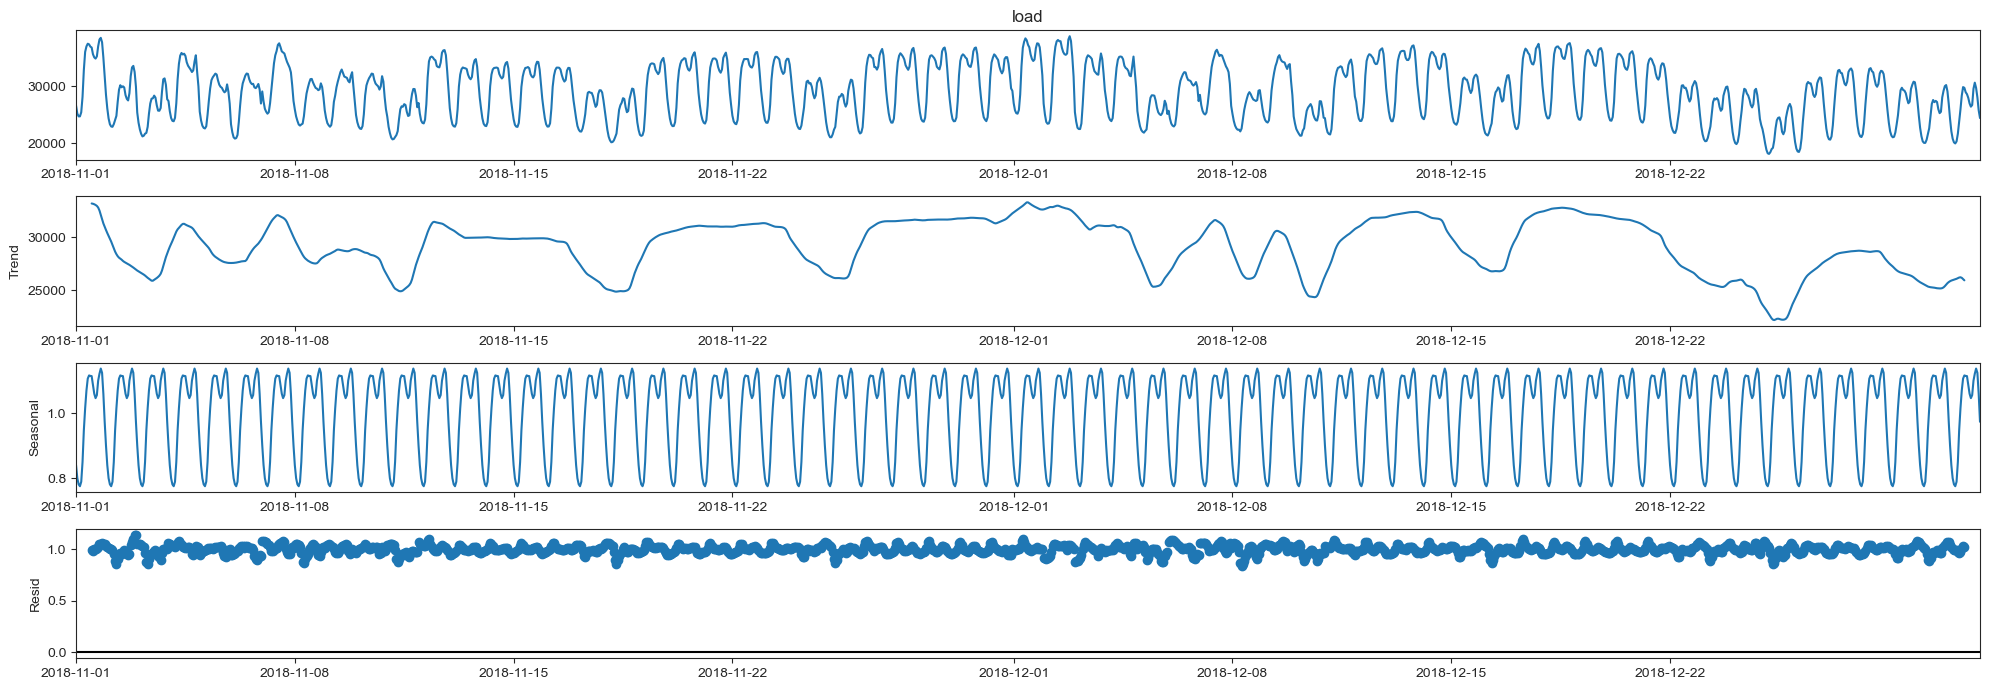

In [204]:
decomposition = seasonal_decompose(df['load'],model='multiplicative')
decomposition.plot();

- For the multiplicative series, we see that a lot of residuals are located around 1 and no patters in the residuals, which is good.
- For this data Multiplicative model performs better. 

In [275]:
# creating a fucntion to plot moving averages for different time intervals.
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20, 8))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="lower left")
    plt.grid(True)

In [265]:
# anomoly check
anomoly_check = df[['load']]
anomoly_check.head()

load
time                               
2018-11-01 00:00:00+00:00 26,646.00
2018-11-01 01:00:00+00:00 25,233.00
2018-11-01 02:00:00+00:00 24,749.00
2018-11-01 03:00:00+00:00 24,751.00
2018-11-01 04:00:00+00:00 25,463.00

In [266]:
ads_anomaly = anomoly_check.copy()
# checking 80% drop of loads > greater than 80% of the load will be shown as outliers
ads_anomaly.iloc[-20] = ads_anomaly.iloc[-20] * 0.2  

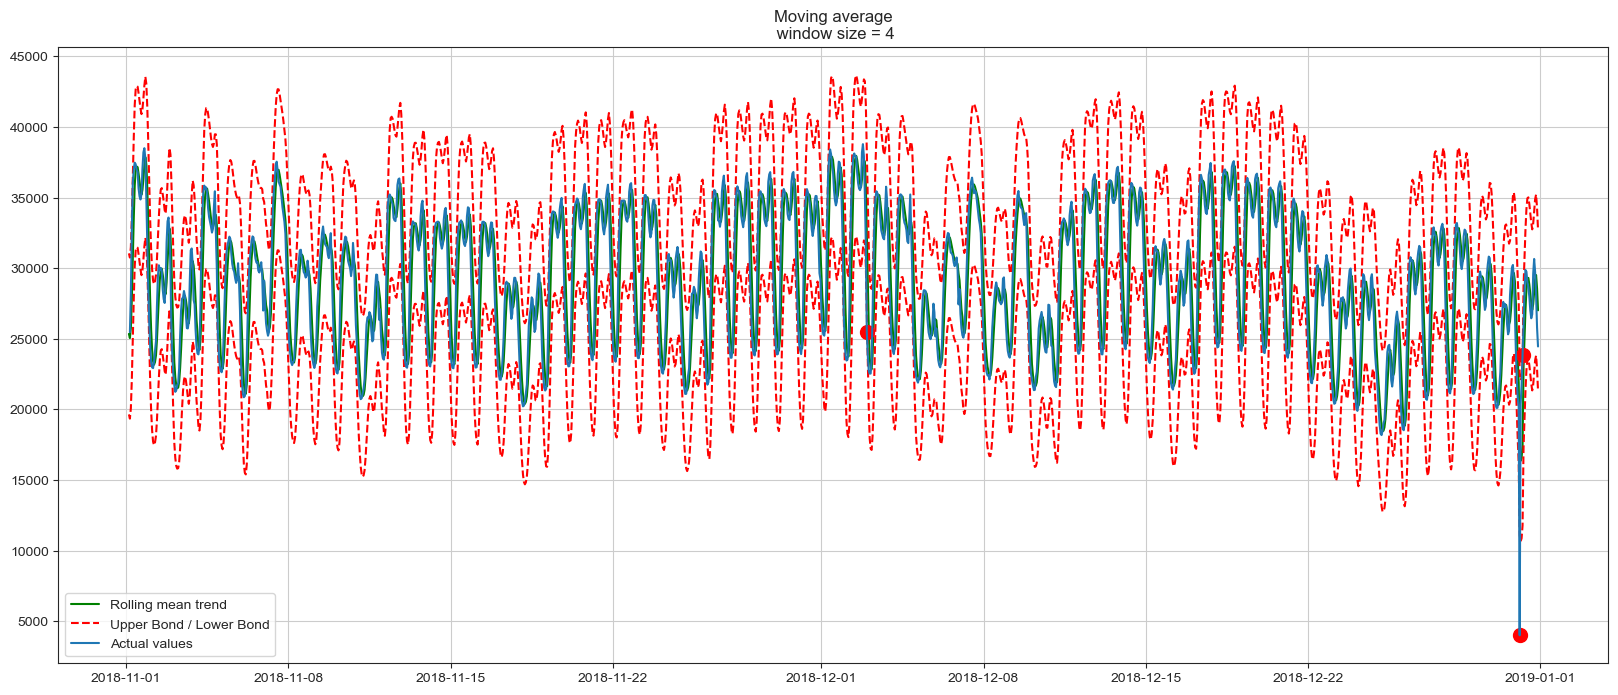

In [276]:
# using windows size of 4 to check the outerliers.
plotMovingAverage(ads_anomaly, 4, plot_intervals=True, plot_anomalies=True)

- With the window size of 4 we can see we have 2 outliers these outliers (around 03/12/2018 and 30-31/12/2018 ).

## Model Building

### Linear regression

In [216]:
train = df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

In [217]:
train.shape

(1024, 2)

In [218]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
#print('Training Time instance','\n',train_time)
#print('Test Time instance','\n',test_time)

In [219]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [220]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
lr = LinearRegression()

In [223]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['load'].values)

LinearRegression()

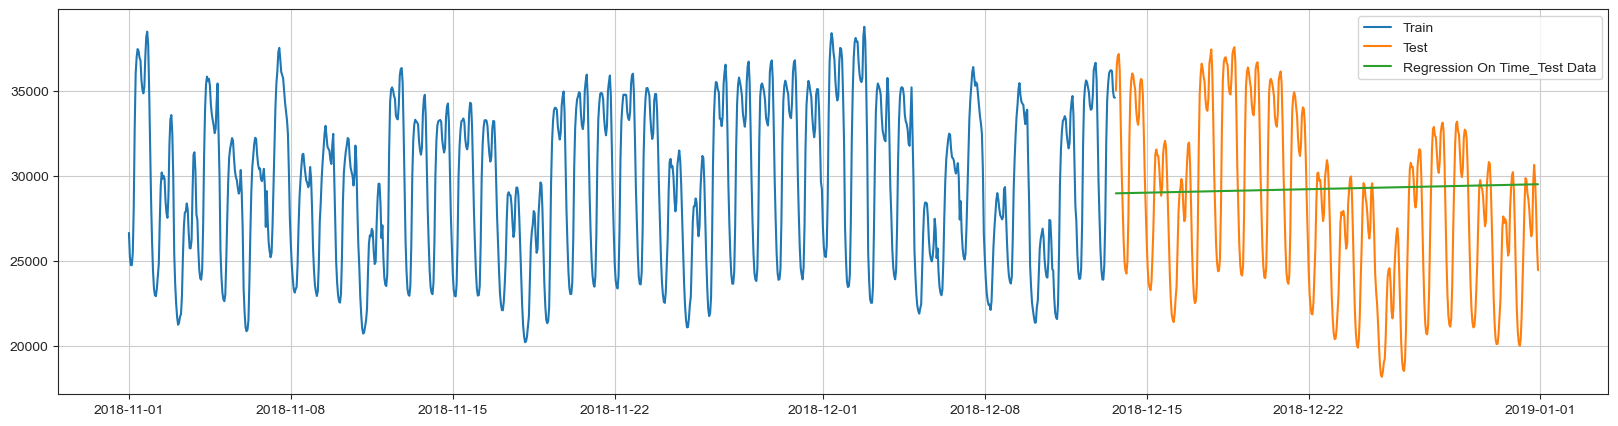

In [224]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(20,5))
plt.plot( train['load'], label='Train')
plt.plot(test['load'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

- Linear regression model not able to follow the patters of test data.

In [225]:
# metrics to evaluate
from sklearn import metrics

In [226]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['load'],test_predictions_model1,squared=False)
mae_model1_test = metrics.mean_absolute_error(test['load'],test_predictions_model1)
mse_model1_test = metrics.mean_squared_error(test['load'], test_predictions_model1)
mape_mdoel1_test = metrics.mean_absolute_percentage_error(test['load'], test_predictions_model1)

print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAE is %3.3f" %(mae_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MSE is %3.3f" %(mse_model1_test))
print("For RegressionOnTime forecast on the Test Data,  MAPE is %3.1f%%" %(mape_mdoel1_test*100))

For RegressionOnTime forecast on the Test Data,  RMSE is 5044.042
For RegressionOnTime forecast on the Test Data,  MAE is 4200.607
For RegressionOnTime forecast on the Test Data,  MSE is 25442360.703
For RegressionOnTime forecast on the Test Data,  MAPE is 16.1%


In [227]:
# set 2 decimals placeholders
pd.options.display.float_format = '{:,.2f}'.format
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test], 'Test MAE':[mae_model1_test],
                          'Test MSE':[mse_model1_test], 'Test MAPE':[mape_mdoel1_test] },index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAE      Test MSE  Test MAPE
RegressionOnTime   5,044.04  4,200.61 25,442,360.70       0.16

## Model 2: Naive Approach:  y^t+1=yt
- For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [228]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [229]:
NaiveModel_test['naive'] = np.asarray(train['load'])[len(np.asarray(train['load']))-1]
NaiveModel_test['naive'].head()

time
2018-12-13 16:00:00+00:00   34,613.00
2018-12-13 17:00:00+00:00   34,613.00
2018-12-13 18:00:00+00:00   34,613.00
2018-12-13 19:00:00+00:00   34,613.00
2018-12-13 20:00:00+00:00   34,613.00
Name: naive, dtype: float64

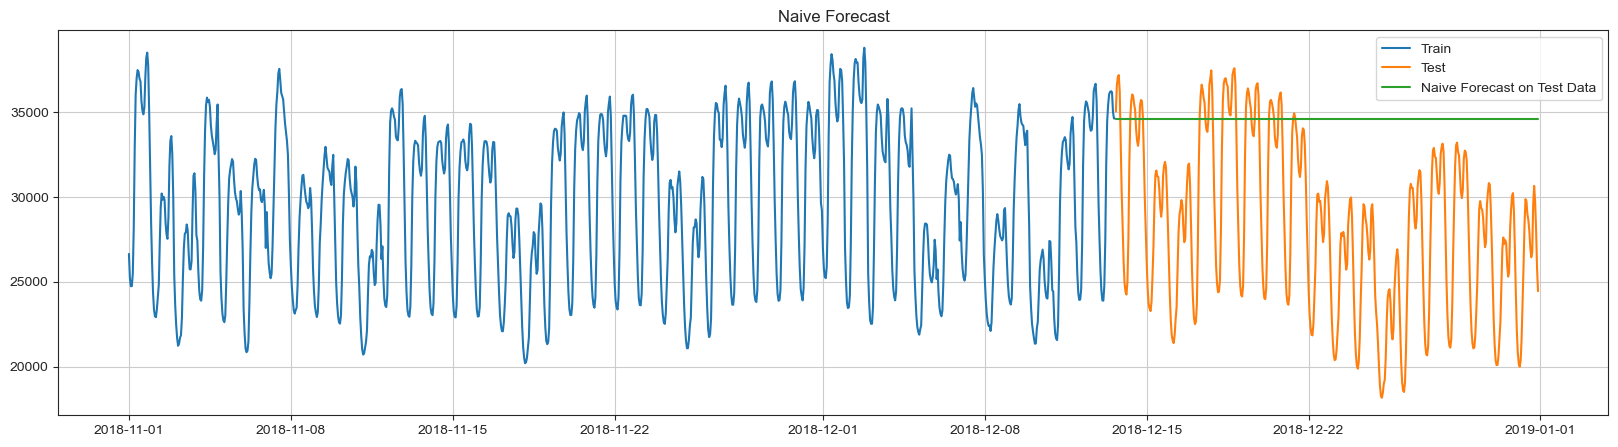

In [230]:
plt.figure(figsize=(20,5))
plt.plot(NaiveModel_train['load'], label='Train')
plt.plot(test['load'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

- Model not able to follow the patters of test data.

In [231]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['load'],NaiveModel_test['naive'],squared=False)
mae_model2_test = metrics.mean_absolute_error(test['load'],NaiveModel_test['naive'])
mse_model2_test = metrics.mean_squared_error(test['load'], NaiveModel_test['naive'])
mape_model2_test = metrics.mean_absolute_percentage_error(test['load'], NaiveModel_test['naive'])

print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
print("For Naive Bayes forecast on the Test Data,  MAE is %3.3f" %(mae_model2_test))
print("For Naive Bayes forecast on the Test Data,  MSE is %3.3f" %(mse_model2_test))
print("For Naive Bayes forecast on the Test Data,  MAPE is %3.1f%%" %(mape_model2_test*100))

For Naive Bayes forecast on the Test Data,  RMSE is 7963.107
For Naive Bayes forecast on the Test Data,  MAE is 6643.501
For Naive Bayes forecast on the Test Data,  MSE is 63411071.820
For Naive Bayes forecast on the Test Data,  MAPE is 27.1%


In [232]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test], 'Test MAE':[mae_model2_test],
                            'Test MSE':[mse_model2_test], 'Test MAPE':[mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAE      Test MSE  Test MAPE
RegressionOnTime   5,044.04  4,200.61 25,442,360.70       0.16
NaiveModel         7,963.11  6,643.50 63,411,071.82       0.27

## Method 3: Simple Average
- For this particular simple average method, we will forecast by using the average of the training values.

In [233]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [234]:
SimpleAverage_test['mean_forecast'] = train['load'].mean()
SimpleAverage_test.head()

load  forecast  mean_forecast
time                                                        
2018-12-13 16:00:00+00:00 35,033.00 34,925.00      29,551.41
2018-12-13 17:00:00+00:00 36,549.00 36,688.00      29,551.41
2018-12-13 18:00:00+00:00 37,065.00 36,891.00      29,551.41
2018-12-13 19:00:00+00:00 37,179.00 36,818.00      29,551.41
2018-12-13 20:00:00+00:00 36,201.00 35,787.00      29,551.41

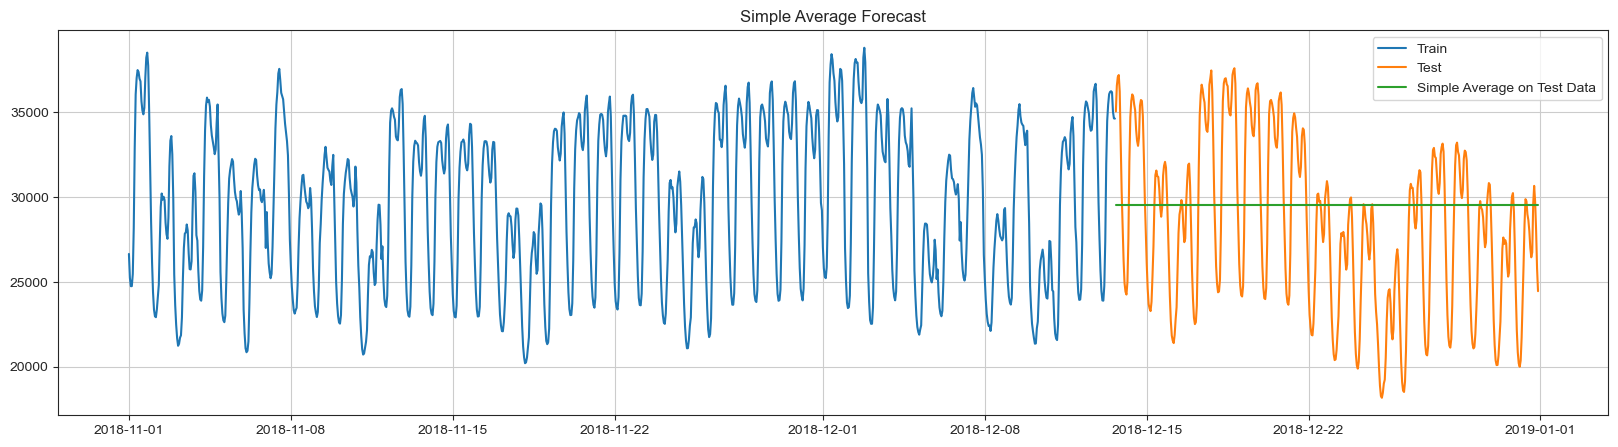

In [235]:
plt.figure(figsize=(20,5))
plt.plot(SimpleAverage_train['load'], label='Train')
plt.plot(SimpleAverage_test['load'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

- Simple Moving average model not able to follow the patters of test data.

In [246]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['load'],SimpleAverage_test['mean_forecast'],squared=False)
mae_model3_test = metrics.mean_absolute_error(test['load'],SimpleAverage_test['mean_forecast'])
mse_model3_test = metrics.mean_squared_error(test['load'], SimpleAverage_test['mean_forecast'])
mape_model3_test = metrics.mean_absolute_percentage_error(test['load'], SimpleAverage_test['mean_forecast'])

print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
print("For Naive Bayes forecast on the Test Data,  MAE is %3.3f" %(mae_model3_test))
print("For Naive Bayes forecast on the Test Data,  MSE is %3.1f%%" %(mse_model3_test*100))
print("For Naive Bayes forecast on the Test Data,  MAPE is %3.1f%%" %(mape_model3_test*100))


For Naive Bayes forecast on the Test Data,  RMSE is 5052.629
For Naive Bayes forecast on the Test Data,  MAE is 4197.672
For Naive Bayes forecast on the Test Data,  MSE is 2552906018.1%
For Naive Bayes forecast on the Test Data,  MAPE is 16.3%


In [247]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test], 'Test MAE' :[mae_model3_test],
                            'Test MSE':[mse_model3_test], 'Test MAPE':[mape_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAE      Test MSE  Test MAPE
RegressionOnTime              5,044.04  4,200.61 25,442,360.70       0.16
NaiveModel                    7,963.11  6,643.50 63,411,071.82       0.27
SimpleAverageModel            5,052.63  4,197.67 25,529,060.18       0.16
2pointTrailingMovingAverage     756.45    587.06    572,218.03       0.02
4pointTrailingMovingAverage   2,060.08  1,653.53  4,243,919.71       0.06
6pointTrailingMovingAverage   3,044.86  2,489.05  9,271,147.54       0.09
9pointTrailingMovingAverage   3,915.07  3,192.27 15,327,788.80       0.12
SimpleAverageModel            5,052.63  4,197.67 25,529,060.18       0.16

## Method 4: Moving Average(MA)
- For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
- For Moving Average, we are going to average over the entire data.

In [238]:
MovingAverage = df.copy()
MovingAverage.head()

load  forecast
time                                         
2018-11-01 00:00:00+00:00 26,646.00 26,735.00
2018-11-01 01:00:00+00:00 25,233.00 25,306.00
2018-11-01 02:00:00+00:00 24,749.00 24,860.00
2018-11-01 03:00:00+00:00 24,751.00 24,735.00
2018-11-01 04:00:00+00:00 25,463.00 25,354.00

In [239]:
MovingAverage['Trailing_2'] = MovingAverage['load'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['load'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['load'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['load'].rolling(9).mean()

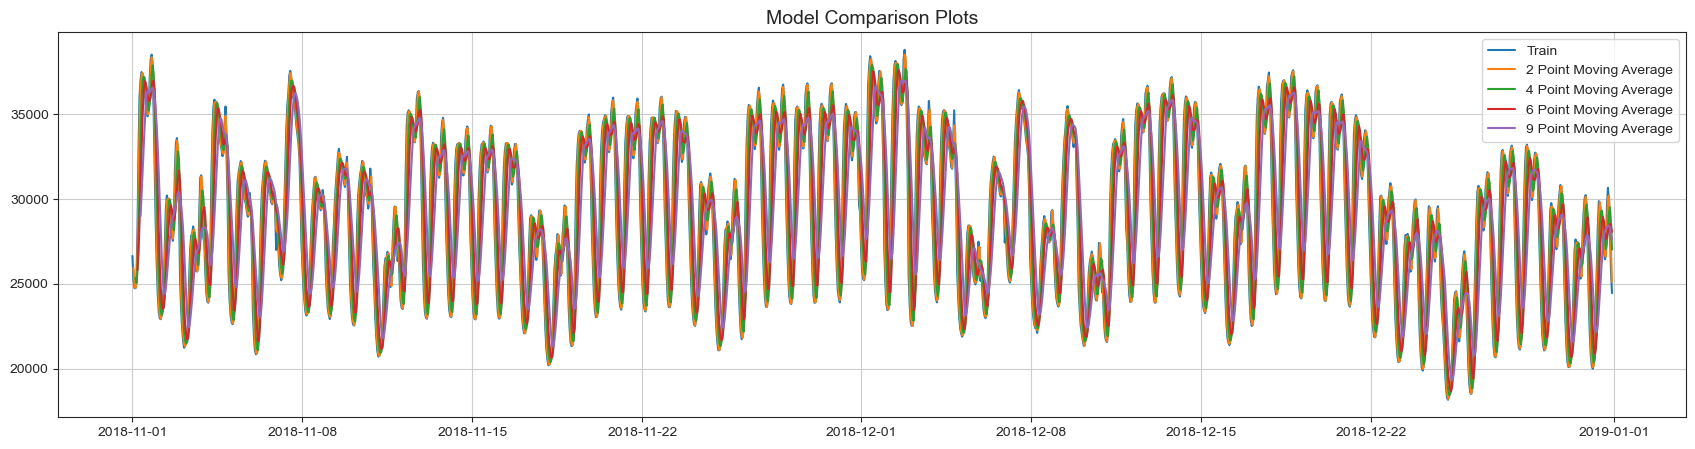

In [258]:
## Plotting on the whole data

plt.figure(figsize=(21,5))
plt.plot(MovingAverage['load'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Model Comparison Plots",fontsize=14)
plt.grid();

- Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [241]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

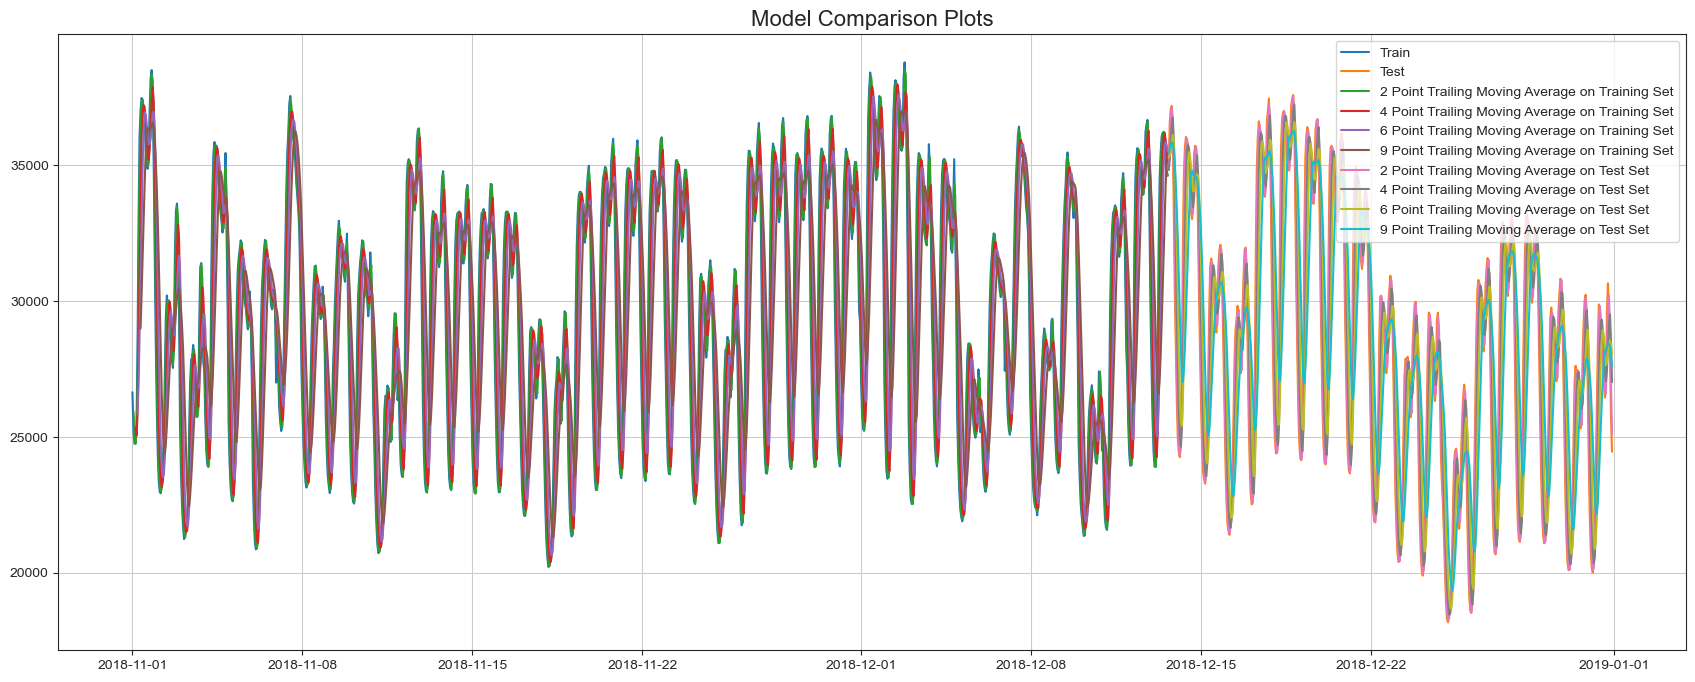

In [256]:
## Plotting on both the Training and Test data

plt.figure(figsize=(21,8))
plt.plot(trailing_MovingAverage_train['load'], label='Train')
plt.plot(trailing_MovingAverage_test['load'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.title("Model Comparison Plots",fontsize=16)
plt.grid();

In [243]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mae_model4_test_2 = metrics.mean_absolute_error(test['load'],trailing_MovingAverage_test['Trailing_2'])
mse_model4_test_2 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_2'])
mape_model4_test_2 = metrics.mean_absolute_percentage_error(test['load'],trailing_MovingAverage_test['Trailing_2'])

print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))
print("For 2 point Moving Average Model forecast on the Training Data,  MAE is %3.3f" %(mae_model4_test_2))
print("For 2 point Moving Average Model forecast on the Training Data,  MSE is %3.3f" %(mse_model4_test_2))
print("For 2 point Moving Average Model forecast on the Training Data,  MAPE is %3.1f%%" %(mape_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mae_model4_test_4 = metrics.mean_absolute_error(test['load'],trailing_MovingAverage_test['Trailing_4'])
mse_model4_test_4 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_4'])
mape_model4_test_4 = metrics.mean_absolute_percentage_error(test['load'],trailing_MovingAverage_test['Trailing_4'])


print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))
print("For 4 point Moving Average Model forecast on the Training Data,  MAE is %3.3f" %(mae_model4_test_4))
print("For 4 point Moving Average Model forecast on the Training Data,  MSE is %3.3f" %(mse_model4_test_4))
print("For 4 point Moving Average Model forecast on the Training Data,  MAPE is %3.1f%%" %(mape_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mae_model4_test_6 = metrics.mean_absolute_error(test['load'],trailing_MovingAverage_test['Trailing_6'])
mse_model4_test_6 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_6'])
mape_model4_test_6 = metrics.mean_absolute_percentage_error(test['load'],trailing_MovingAverage_test['Trailing_6'])

print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))
print("For 6 point Moving Average Model forecast on the Training Data,  MAE is %3.3f" %(mae_model4_test_6))
print("For 6 point Moving Average Model forecast on the Training Data,  MSE is %3.3f" %(mse_model4_test_6))
print("For 6 point Moving Average Model forecast on the Training Data,  MAPE is %3.1f%%" %(mape_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mae_model4_test_9 = metrics.mean_absolute_error(test['load'],trailing_MovingAverage_test['Trailing_9'])
mse_model4_test_9 = metrics.mean_squared_error(test['load'],trailing_MovingAverage_test['Trailing_9'])
mape_model4_test_9 = metrics.mean_absolute_percentage_error(test['load'],trailing_MovingAverage_test['Trailing_9'])

print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))
print("For 9 point Moving Average Model forecast on the Training Data,  MAE is %3.3f " %(mae_model4_test_9))
print("For 9 point Moving Average Model forecast on the Training Data,  MSE is %3.3f " %(mse_model4_test_9))
print("For 9 point Moving Average Model forecast on the Training Data,  MAPE is %3.1f%% " %(mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 756.451
For 2 point Moving Average Model forecast on the Training Data,  MAE is 587.059
For 2 point Moving Average Model forecast on the Training Data,  MSE is 572218.031
For 2 point Moving Average Model forecast on the Training Data,  MAPE is 0.0%
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 2060.078
For 4 point Moving Average Model forecast on the Training Data,  MAE is 1653.535
For 4 point Moving Average Model forecast on the Training Data,  MSE is 4243919.708
For 4 point Moving Average Model forecast on the Training Data,  MAPE is 0.1%
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 3044.856
For 6 point Moving Average Model forecast on the Training Data,  MAE is 2489.047
For 6 point Moving Average Model forecast on the Training Data,  MSE is 9271147.543
For 6 point Moving Average Model forecast on the Training Data,  MAPE is 0.1%
For 9 point Moving Average M

In [244]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9],\
    'Test MAE' :[mae_model4_test_2,mae_model4_test_4, mae_model4_test_6, mae_model4_test_9],\
        'Test MSE':[mse_model4_test_2, mse_model4_test_4, mse_model4_test_6, mse_model4_test_9],\
            'Test MAPE':[mape_model4_test_2, mape_model4_test_4, mape_model4_test_6, mape_model4_test_9]},index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAE      Test MSE  Test MAPE
RegressionOnTime              5,044.04  4,200.61 25,442,360.70       0.16
NaiveModel                    7,963.11  6,643.50 63,411,071.82       0.27
SimpleAverageModel            5,052.63  4,197.67 25,529,060.18       0.16
2pointTrailingMovingAverage     756.45    587.06    572,218.03       0.02
4pointTrailingMovingAverage   2,060.08  1,653.53  4,243,919.71       0.06
6pointTrailingMovingAverage   3,044.86  2,489.05  9,271,147.54       0.09
9pointTrailingMovingAverage   3,915.07  3,192.27 15,327,788.80       0.12

In [249]:
# lowest RMSE.
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAE      Test MSE  Test MAPE
2pointTrailingMovingAverage     756.45    587.06    572,218.03       0.02
4pointTrailingMovingAverage   2,060.08  1,653.53  4,243,919.71       0.06
6pointTrailingMovingAverage   3,044.86  2,489.05  9,271,147.54       0.09
9pointTrailingMovingAverage   3,915.07  3,192.27 15,327,788.80       0.12
RegressionOnTime              5,044.04  4,200.61 25,442,360.70       0.16
SimpleAverageModel            5,052.63  4,197.67 25,529,060.18       0.16
SimpleAverageModel            5,052.63  4,197.67 25,529,060.18       0.16
NaiveModel                    7,963.11  6,643.50 63,411,071.82       0.27

**Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.**

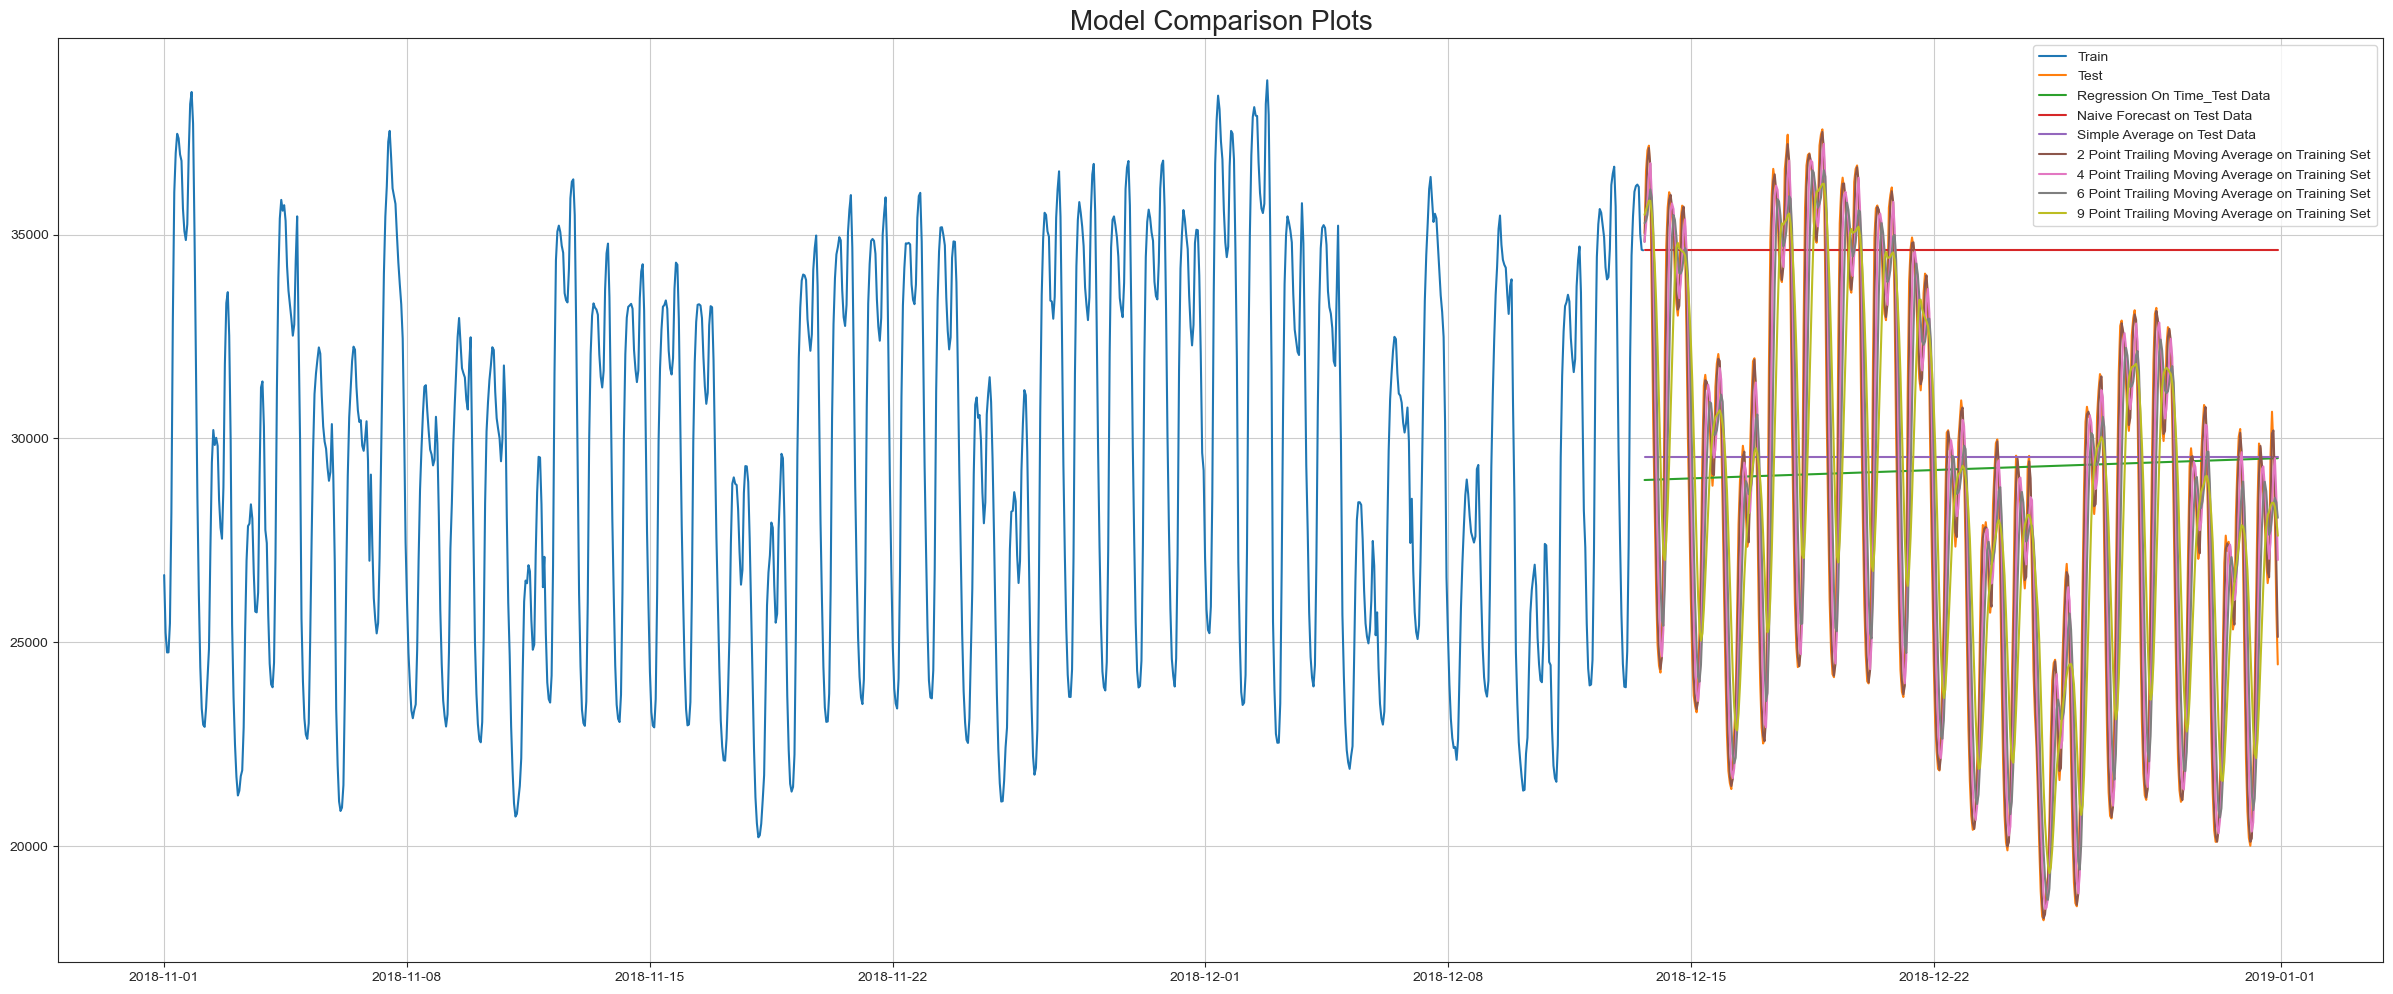

In [254]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['load'], label='Train')
plt.plot(test['load'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=20)
plt.grid();

- With all the models we have built we can observe that 2pointTrailingMovingAverage produced lowest RMSE score and able to follow the patters of test data.

## Method 5: Simple Exponential Smoothing